<a href="https://colab.research.google.com/github/tom-schoener/ml-probability/blob/master/tfp-evaluation/notebooks/starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Probability *Starter*
Contains some early experiments with Tensorflow probability.

In [0]:
#!pip install --upgrade tf-nightly
#!pip install --upgrade tfp-nightly

from datetime import datetime, timedelta

import collections
from scipy.interpolate import interp1d
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import pandas as pd
tfd = tfp.distributions

try:
  tf.compat.v1.enable_eager_execution()
except ValueError:
  pass

import matplotlib.pyplot as plt

from __future__ import print_function

In [0]:
# helper functions 
def showHistorgram(sample, name="", bins=None): 
  plt.figure(figsize=(12,8))
  plt.hist(sample, color='blue', alpha=0.4, bins=bins)
  plt.title(name + " Historgram")
  plt.show()
  
def showScattered(sample, name=""): 
  plt.scatter(sample[:, 0], sample[:, 1], color='blue', alpha=0.2)
  plt.title(name + " Scatterplot")
  plt.show()

# Possion distribution 

In [0]:
poisson_dist = tfd.Poisson(name="Poisson Dist", rate=4.)
poisson_dist_2d = tfd.Poisson(name="Poisson Dist", rate=[10., 2.])
poisson_dist

<tfp.distributions.Poisson 'Poisson Dist/' batch_shape=() event_shape=() dtype=float32>

In [0]:
poisson_sample_size = 10000
poisson_sample = poisson_dist.sample(poisson_sample_size, name="Poisson Sample")
poisson_2d_sample = poisson_dist_2d.sample(poisson_sample_size, name="Poisson Sample 2D")
print("Sample:", poisson_sample[:10])

Sample: tf.Tensor([3. 3. 5. 4. 3. 4. 3. 4. 7. 4.], shape=(10,), dtype=float32)


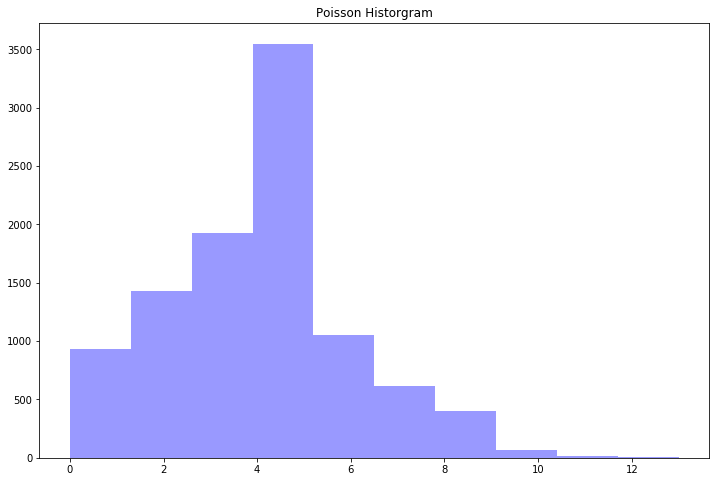

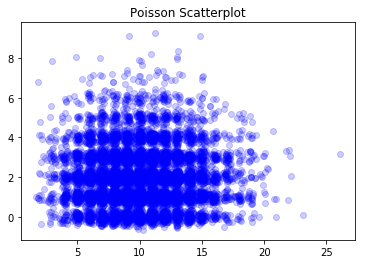

In [0]:
# sample histogram
showHistorgram(poisson_sample, "Poisson")

# plotting two poisson distributions in a scatter plot
noice = tf.random.normal(poisson_2d_sample.shape, stddev=0.2)
showScattered(poisson_2d_sample + noice, "Poisson")

# Normal Distribution

In [0]:
normal_dist = tfd.Normal(name="Normal Dist", loc=0., scale=1.)
print(normal_dist)
print("sample 1D: " + str(normal_dist.sample()))

normal_dist_2d = tfd.Normal(name="Normal Dist 2D", loc=[0., 10.], scale=1.)
print(normal_dist_2d)
print("sample 2D: " + str(normal_dist_2d.sample()))

tfp.distributions.Normal("Normal Dist/", batch_shape=(), event_shape=(), dtype=float32)
sample 1D: tf.Tensor(-0.23516966, shape=(), dtype=float32)
tfp.distributions.Normal("Normal Dist 2D/", batch_shape=(2,), event_shape=(), dtype=float32)
sample 2D: tf.Tensor([ 0.03174939 11.173188  ], shape=(2,), dtype=float32)


In [0]:
normal_sample_size = 25000
normal_sample = normal_dist.sample(normal_sample_size)
normal_2d_sample = normal_dist_2d.sample(normal_sample_size)
normal_sample

<tf.Tensor: id=378, shape=(25000,), dtype=float32, numpy=
array([ 0.07815085,  1.0128385 , -0.113426  , ..., -0.31344673,
       -0.3763707 , -1.0461634 ], dtype=float32)>

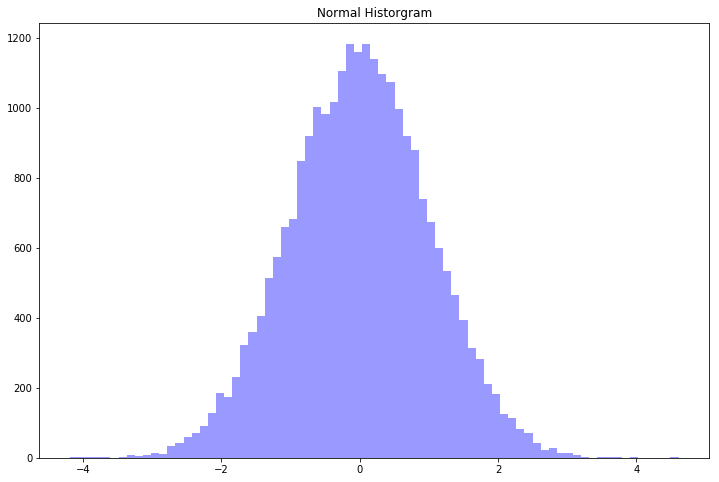

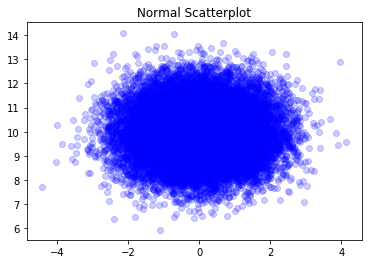

In [0]:
# sample histogram
showHistorgram(normal_sample, name="Normal", bins=75)

# plotting two normal distributions in a scatter plot
showScattered(normal_2d_sample, name="Normal")

# Multinomial Distribution

In [0]:
p = [.1, .3, .6]
multinomial_dist = tfd.Multinomial(total_count=100., probs=p, name='Multinomial')
multinomial_dist

<tfp.distributions.Multinomial 'Multinomial/' batch_shape=() event_shape=(3,) dtype=float32>

In [0]:
# The sum of all draws combined has to equal the total count of the distribution 
simple_mulinomial_sample = multinomial_dist.sample()
print(simple_mulinomial_sample)
print("sum(%s) = %i" % (np.array(simple_mulinomial_sample), multinomial_dist.total_count))

tf.Tensor([ 5. 34. 61.], shape=(3,), dtype=float32)
sum([ 5. 34. 61.]) = 100


In [0]:
multinomial_sample_size = 5000
multinomial_sample = multinomial_dist.sample(multinomial_sample_size)
print(multinomial_sample)

tf.Tensor(
[[ 8. 33. 59.]
 [16. 27. 57.]
 [ 8. 31. 61.]
 ...
 [14. 30. 56.]
 [10. 33. 57.]
 [11. 23. 66.]], shape=(5000, 3), dtype=float32)


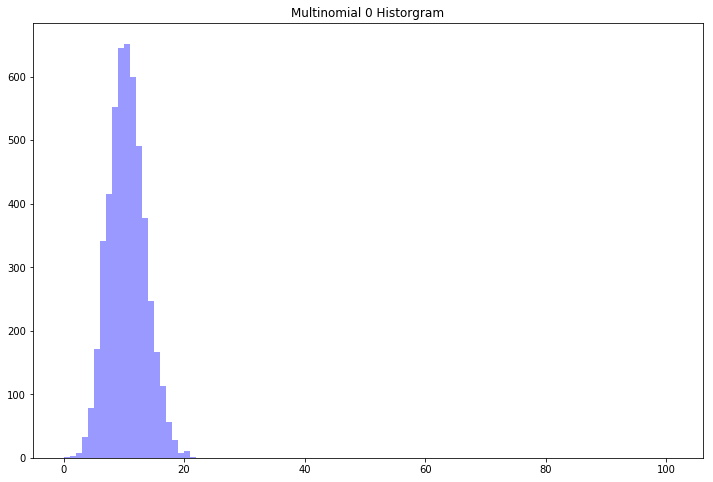

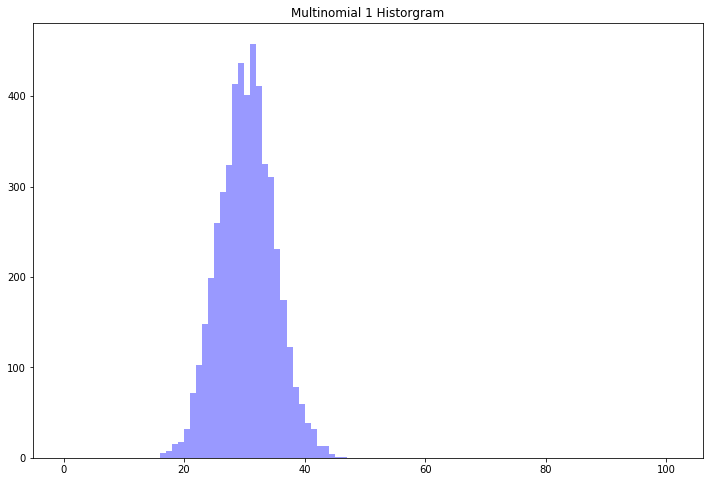

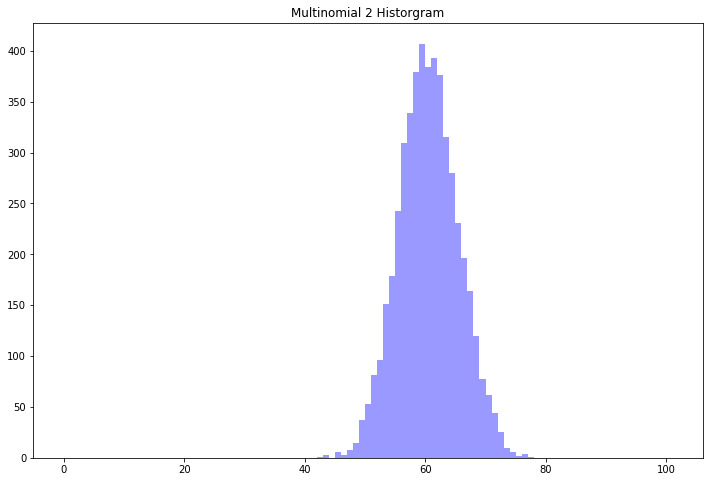

In [0]:
# shows the distributions of draws based on the probabilities [0.1, 0.3, 0.6]
bins = [i for i in range(multinomial_dist.total_count + 2)]
showHistorgram(multinomial_sample[:, 0], name="Multinomial 0", bins=bins)
showHistorgram(multinomial_sample[:, 1], name="Multinomial 1", bins=bins)
showHistorgram(multinomial_sample[:, 2], name="Multinomial 2", bins=bins)

# Bijectors
https://www.tensorflow.org/probability/api_docs/python/tfp/bijectors/Reshape

In [0]:
reshape = tfp.bijectors.Reshape(event_shape_out=[1, 1,-1])

def describe_shape(arr):
  arr_t = reshape.forward(arr) 
  print("{} \t {} => {} {}".format(arr, np.array(arr).shape, arr_t, arr_t.shape))  

describe_shape([])
describe_shape([1])
describe_shape([1, 2])
describe_shape([[1]])
describe_shape([[1, 2, 3], [4, 5, 6]])

print("reshape.inverse(reshape.forward([1, 2])) equals [1, 2] ?")
print(tf.math.equal(reshape.inverse(reshape.forward([1, 2])), [1, 2]))

[] 	 (0,) => [] (1, 1, 0)
[1] 	 (1,) => [[[1]]] (1, 1, 1)
[1, 2] 	 (2,) => [[[1 2]]] (1, 1, 2)
[[1]] 	 (1, 1) => [[[[1]]]] (1, 1, 1, 1)
[[1, 2, 3], [4, 5, 6]] 	 (2, 3) => [[[[1 2 3]]]


 [[[4 5 6]]]] (2, 1, 1, 3)
reshape.inverse(reshape.forward([1, 2])) equals [1, 2] ?
tf.Tensor([ True  True], shape=(2,), dtype=bool)


# Probabilistic Models

with  Approximate Bayesian Computation (naive, see: https://en.wikipedia.org/wiki/Approximate_Bayesian_computation )

## Szenario

Randomly select products from a factory. Out of 50 draws 4 are faulty or damaged. 

## Question

 Is it likely that in future draws 4 out of 50 products are faulty? How can one describe its uncertainty.


## Information

What does the posterieur distribution look like when the prior distribution is uniform and the generative model is based on a binomial distribution.

In [0]:
def abc_simple(prior_dist, tested_total, tested_faulty, steps=1000, epsilon=2):
  '''Approximate Bayesian Computation (naive)'''

  # select rate from prior via sampling
  rates = prior_dist.sample(steps)


  # generative model distribution
  faulty_samples = []
  i = 0
  for rate in rates:
    if i % (int(steps / 10)) == 0:
      print("{}%".format("%.2f" % (100 * i / steps)))
    
    generative_model_dist = tfd.Multinomial(total_count=1, probs=[rate, 1-rate], name="generative model")
    sample = generative_model_dist.sample(tested_total)
    faulty_samples += [sum(sample[:, 0])]
    i += 1

  # ABC rejection algorithm
  results = []
  for [rate, computed_faulty] in zip(rates, faulty_samples):
    if (computed_faulty - tested_faulty) ** 2 > epsilon ** 2:
      continue

    results += [rate]

  return results

In [0]:
# given data
products_tested_total = 50
products_tested_faulty = 4
products_tested_good = products_tested_total - products_tested_faulty

# model steps
steps = 5000
epsilon = 1

# prior distribution
prior_dist = tfd.uniform.Uniform(name="prior")

# compute model
dist_result = abc_simple(prior_dist=prior_dist,
           tested_total=products_tested_total,
           tested_faulty=products_tested_faulty,
           steps=steps,
           epsilon=epsilon)

0.00%
10.00%
20.00%
30.00%
40.00%
50.00%
60.00%
70.00%
80.00%
90.00%


Expected mean: 8.0%
number of successful rates: 322
mean: 9.62%
std: 0.04


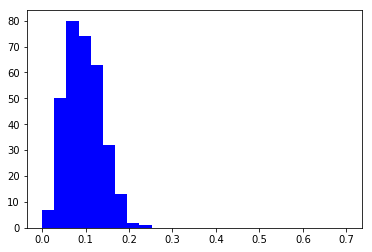

In [0]:
# evaluate model
np_dist_result = np.array(dist_result)

print("Expected mean: {}%".format(100 * products_tested_faulty / products_tested_total))
print("number of successful rates: {}".format(len(dist_result)))

mean = sum(dist_result) / len(dist_result)
std = np.std(dist_result)
print("mean: {}%".format("%.2f" % (mean * 100)))
print("std: {}".format("%.2f" % std))

plt.hist(dist_result, color='blue', range=[0, 0.7], bins=25)
plt.show()

This sampled distribution describes the percentage of damaged products based on the data "4 out of 50 draws".
It shows that it is possible, but very unlikely to achieve no damaged products at all (see the left side of the distribution). With a standard deviation of 0.04 and a mean of ~0.1. Thus, with a probability of ~95% (mean +/- 2*s) 2% to 18% of all products are damaged.

![normal dist](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/2560px-Standard_deviation_diagram.svg.png)